# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
from citipy import citipy
import requests
import json
import random
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
from config import weather_api_key

## Generate Cities List

In [2]:
# Initialize lists for latitudes and longitudes
random_lats = []
random_longs = []

# Generate 500 random lats and longs
for i in range (0,499):
    lat = random.randint(-90,90)
    random_lats.append(lat)
    
    long = random.randint(-180,180)
    random_longs.append(long)

In [3]:
# Initialize lists for cities and countries
cities = []
countries = []

# Find nearest city to each lat/long pair
for i in range(0,499):
    city = citipy.nearest_city(random_lats[i],random_longs[i])
    cities.append(city.city_name)
    countries.append(city.country_code)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
# Initializes lists for weather data
latitudes = []
longitudes = []
temperatures = []
humidity = []
cloudiness = []
wind_speed = []

print("Beginning Data Retrieval")
print("--------------------------")

# Loops through each city to retrieve weather data via API calls
# Enters null values if no weather data is found
for i in range(0,499):
    print(f"Processing Record {i+1} of 500 | {cities[i]},{countries[i]}")
    try:
        url = f"http://api.openweathermap.org/data/2.5/weather?q={cities[i]},{countries[i]}&appid={weather_api_key}&units=metric"
        response = requests.get(url).json()
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        temperatures.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
    except:
        print("City not found.")
        latitudes.append(None)
        longitudes.append(None)
        temperatures.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_speed.append(None)
        pass
        



Beginning Data Retrieval
--------------------------
Processing Record 1 of 500 | lasa,cn
City not found.
Processing Record 2 of 500 | ushuaia,ar
Processing Record 3 of 500 | mataura,pf
City not found.
Processing Record 4 of 500 | bambous virieux,mu
Processing Record 5 of 500 | dakar,sn
Processing Record 6 of 500 | ponta do sol,cv
Processing Record 7 of 500 | portland,au
Processing Record 8 of 500 | poum,nc
Processing Record 9 of 500 | nikolskoye,ru
Processing Record 10 of 500 | arraial do cabo,br
Processing Record 11 of 500 | nikolskoye,ru
Processing Record 12 of 500 | kuryk,kz
Processing Record 13 of 500 | taolanaro,mg
City not found.
Processing Record 14 of 500 | albany,au
Processing Record 15 of 500 | chokurdakh,ru
Processing Record 16 of 500 | albany,au
Processing Record 17 of 500 | avarua,ck
Processing Record 18 of 500 | rostovka,ru
Processing Record 19 of 500 | rikitea,pf
Processing Record 20 of 500 | senador jose porfirio,br
Processing Record 21 of 500 | santa maria,cv
Processin

Processing Record 184 of 500 | illoqqortoormiut,gl
City not found.
Processing Record 185 of 500 | victoria,sc
Processing Record 186 of 500 | nenjiang,cn
Processing Record 187 of 500 | constitucion,cl
Processing Record 188 of 500 | cape town,za
Processing Record 189 of 500 | albany,au
Processing Record 190 of 500 | jamestown,sh
Processing Record 191 of 500 | bairiki,ki
Processing Record 192 of 500 | yellowknife,ca
Processing Record 193 of 500 | cairns,au
Processing Record 194 of 500 | busselton,au
Processing Record 195 of 500 | saint-philippe,re
Processing Record 196 of 500 | ilulissat,gl
Processing Record 197 of 500 | acajutla,sv
Processing Record 198 of 500 | busselton,au
Processing Record 199 of 500 | salinopolis,br
Processing Record 200 of 500 | cape town,za
Processing Record 201 of 500 | onalaska,us
Processing Record 202 of 500 | puerto ayora,ec
Processing Record 203 of 500 | cape town,za
Processing Record 204 of 500 | taburi,ph
City not found.
Processing Record 205 of 500 | port a

Processing Record 366 of 500 | hilo,us
Processing Record 367 of 500 | lavrentiya,ru
Processing Record 368 of 500 | illoqqortoormiut,gl
City not found.
Processing Record 369 of 500 | mathbaria,bd
Processing Record 370 of 500 | punta arenas,cl
Processing Record 371 of 500 | east london,za
Processing Record 372 of 500 | sao joao da barra,br
Processing Record 373 of 500 | hobart,au
Processing Record 374 of 500 | san quintin,mx
Processing Record 375 of 500 | mataura,pf
City not found.
Processing Record 376 of 500 | kapaa,us
Processing Record 377 of 500 | rikitea,pf
Processing Record 378 of 500 | ushuaia,ar
Processing Record 379 of 500 | hithadhoo,mv
Processing Record 380 of 500 | rikitea,pf
Processing Record 381 of 500 | ushuaia,ar
Processing Record 382 of 500 | hovd,mn
Processing Record 383 of 500 | ushuaia,ar
Processing Record 384 of 500 | puerto ayora,ec
Processing Record 385 of 500 | belushya guba,ru
City not found.
Processing Record 386 of 500 | butaritari,ki
Processing Record 387 of 5

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
df = pd.DataFrame({
    "City":cities,
    "Lat":latitudes,
    "Lng":longitudes,
    "Temp":temperatures,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":countries
})

df.to_csv("Output/data.csv", index=False, header=True)
df

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country
0,lasa,NaN,NaN,NaN,NaN,NaN,NaN,cn
1,ushuaia,-54.80,-68.30,14.00,33.0,75.0,7.20,ar
2,mataura,NaN,NaN,NaN,NaN,NaN,NaN,pf
3,bambous virieux,-20.34,57.76,23.95,78.0,40.0,3.60,mu
4,dakar,14.69,-17.44,31.00,79.0,40.0,2.10,sn
...,...,...,...,...,...,...,...,...
494,severo-kurilsk,50.68,156.12,6.10,78.0,27.0,8.87,ru
495,dzerzhinsk,NaN,NaN,NaN,NaN,NaN,NaN,by
496,bam,29.11,58.36,15.90,23.0,0.0,3.10,ir
497,albany,-35.02,117.89,10.00,93.0,90.0,2.50,au


In [31]:
df = df.dropna()
df

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country
1,ushuaia,-54.80,-68.30,14.00,33.0,75.0,7.20,ar
3,bambous virieux,-20.34,57.76,23.95,78.0,40.0,3.60,mu
4,dakar,14.69,-17.44,31.00,79.0,40.0,2.10,sn
5,ponta do sol,17.20,-25.09,30.00,70.0,75.0,7.70,cv
6,portland,-38.33,141.60,8.89,72.0,28.0,5.58,au
...,...,...,...,...,...,...,...,...
492,seoul,37.57,126.98,7.70,70.0,1.0,0.95,kr
493,alugan,12.22,125.48,26.21,83.0,100.0,2.25,ph
494,severo-kurilsk,50.68,156.12,6.10,78.0,27.0,8.87,ru
496,bam,29.11,58.36,15.90,23.0,0.0,3.10,ir


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

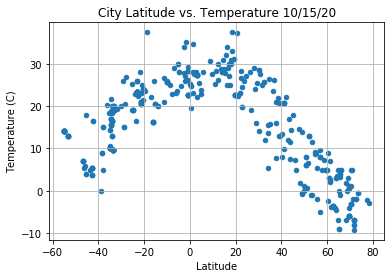

In [36]:
lats_and_temps = df[["Lat","Temp"]]
lats_and_temps.plot(kind="scatter",x="Lat",y="Temp",grid=True)

plt.title("City Latitude vs. Temperature 10/15/20")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")

plt.show()

## Latitude vs. Humidity Plot

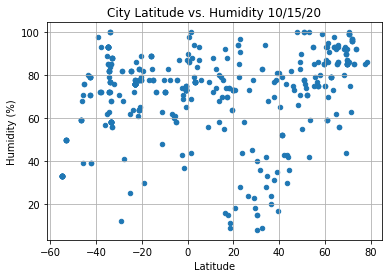

In [37]:
lats_and_hum = df[["Lat","Humidity"]]
lats_and_hum.plot(kind="scatter",x="Lat",y="Humidity",grid=True)

plt.title("City Latitude vs. Humidity 10/15/20")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.show()

## Latitude vs. Cloudiness Plot

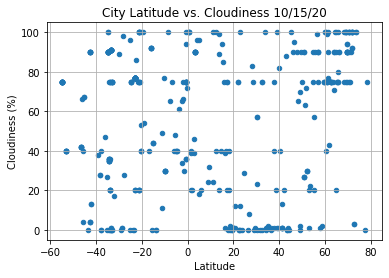

In [38]:
lats_and_clouds = df[["Lat","Cloudiness"]]
lats_and_clouds.plot(kind="scatter",x="Lat",y="Cloudiness",grid=True)

plt.title("City Latitude vs. Cloudiness 10/15/20")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.show()

## Latitude vs. Wind Speed Plot

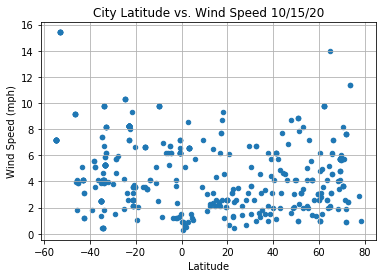

In [39]:
lats_and_wind = df[["Lat","Wind Speed"]]
lats_and_wind.plot(kind="scatter",x="Lat",y="Wind Speed",grid=True)

plt.title("City Latitude vs. Wind Speed 10/15/20")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


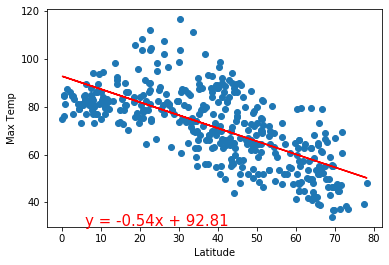

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


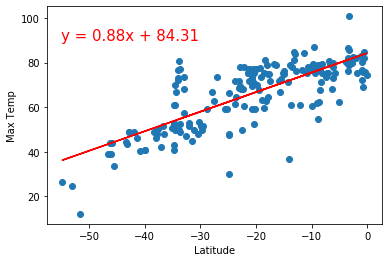

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


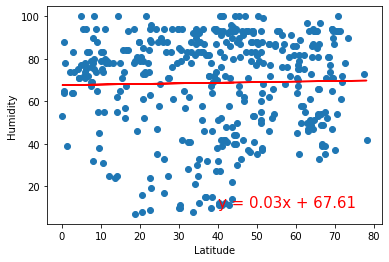

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


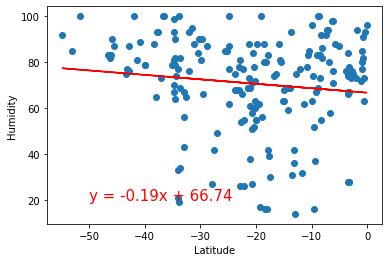

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


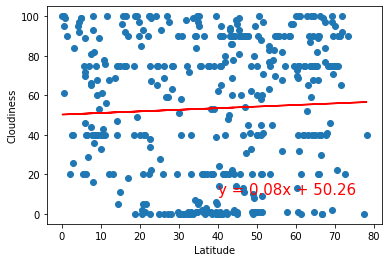

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


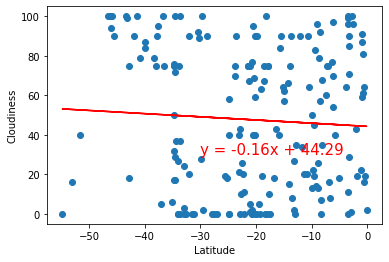

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


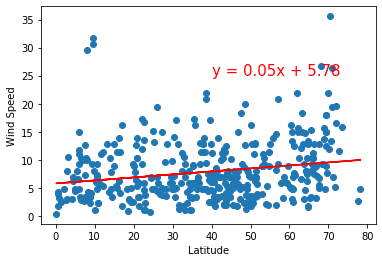

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


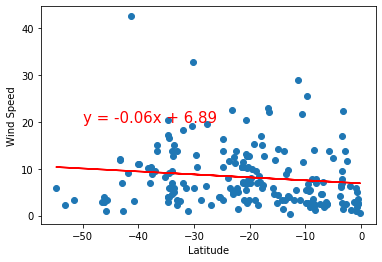